---
# Лабораторна робота №5. Алгоритми пошуку.
Author - Kyrylo Klingen
---

# Мета : засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.

# 1 . Оцінити асимптотичну складність алгоритму лінійного пошуку в О-нотації.

In [ ]:
def linear_search(a_list, x):
i, length = 0, len(a_list)
while i < length and x != a_list[i]:
i += 1
return i if i < length else -1

Асимптотична складність цього алгоритму пошуку O(n).Можемо прописати його по константам часу та кількості дій (n).T(n)=C1+n(C2+C3)+C4.

# 2 . Оцінити асимптотичну складність алгоритму бінарного пошуку в О-нотації.

In [ ]:
def bin_search(a_list, x, left, right):
if left > right or len(a_list) == 0:
return -1
middle = (left + right) // 2
if a_list[middle] == x:
return middle
elif (a_list[middle] < x):
return bin_search(a_list, x, middle + 1, right)
else: # a_list[middle] > x
return bin_search(a_list, x, left, middle - 1)

Асимптотична складність цього алгоритму пошуку O(log(n)).При підрахунку маємо таке рівняння T(n)=T(n/2)+C.Вирішуємо його за основною теоремою рекурсії T(n) = O(log(n)).

# 3 . Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_searh().

In [ ]:
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1
    
def benchmark_linear_search(sizes):
    data = []
    for n in sizes:
        arr = [random.randint(0, 10000) for _ in range(n)]
        x = random.choice(arr) 

        start_time = time.perf_counter()
        linear_search(arr, x)
        end_time = time.perf_counter()

        elapsed_time = end_time - start_time
        data.append({"n": n, "time": elapsed_time})

    return pd.DataFrame(data)
    

# 4 . Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції bin_searh().

In [5]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:  # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

def benchmark_bin_search(sizes):
    data = []
    for n in sizes:
        arr = sorted(random.randint(0, 100000) for _ in range(n))
        x = random.choice(arr)  # елемент, який точно є

        start_time = time.perf_counter()
        bin_search(arr, x, 0, len(arr) - 1)
        end_time = time.perf_counter()

        elapsed = end_time - start_time
        data.append({'n': n, 'time': elapsed})

    return pd.DataFrame(data)

# 5 . За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.



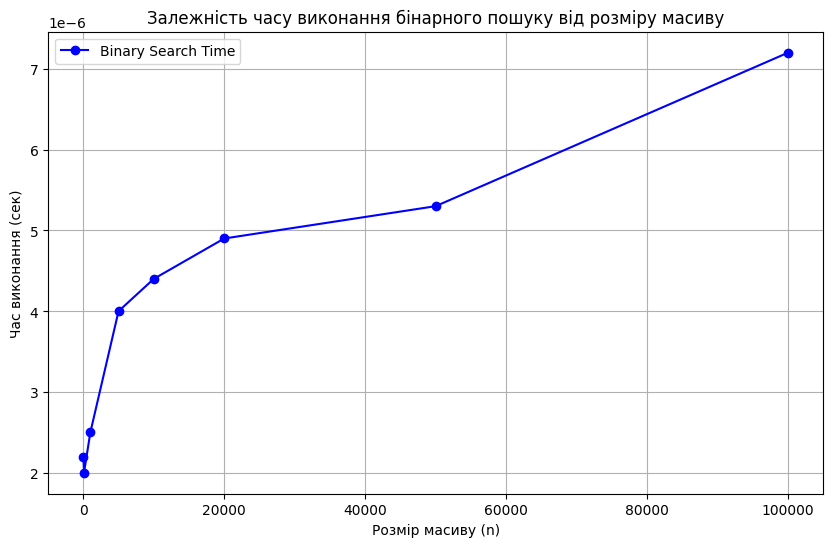

In [6]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# Функція бінарного пошуку
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)

# Функція для вимірювання часу
def benchmark_bin_search(sizes):
    data = []
    for n in sizes:
        arr = sorted(random.randint(0, 100000) for _ in range(n))
        x = random.choice(arr)  # елемент, який точно існує
        start_time = time.perf_counter()
        bin_search(arr, x, 0, len(arr) - 1)
        end_time = time.perf_counter()
        elapsed = end_time - start_time
        data.append({'n': n, 'time': elapsed})
    return pd.DataFrame(data)

# Розміри масивів
sizes = [10, 100, 1000, 5000, 10000, 20000, 50000, 100000]

# Отримання даних
df_bin = benchmark_bin_search(sizes)

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(df_bin['n'], df_bin['time'], marker='o', linestyle='-', color='blue', label='Binary Search Time')
plt.title('Залежність часу виконання бінарного пошуку від розміру масиву')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (сек)')
plt.grid(True)
plt.legend()

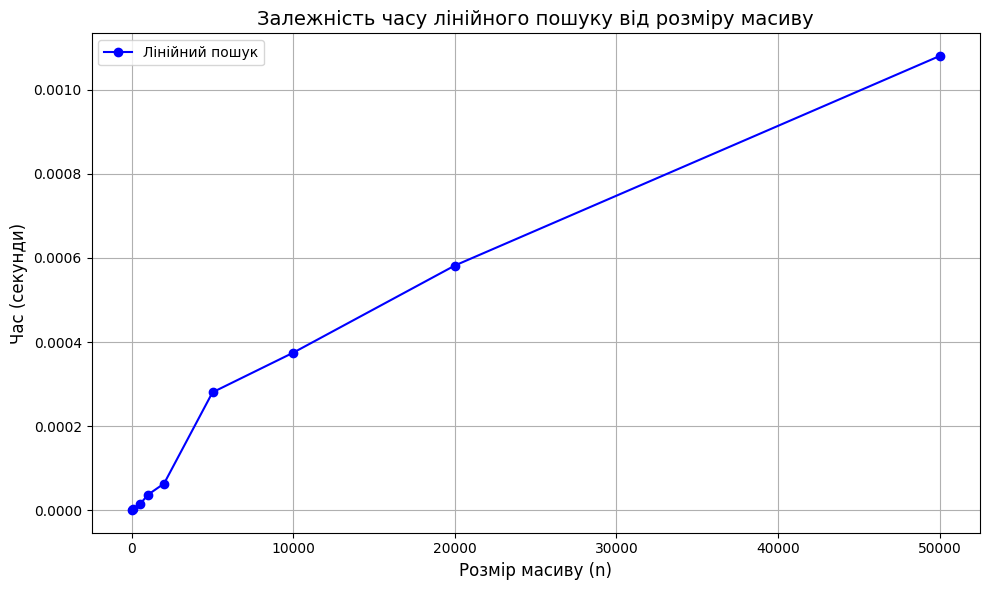

In [7]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

# Лінійний пошук
def linear_search(a_list, x):
    for i in range(len(a_list)):
        if a_list[i] == x:
            return i
    return -1

# Функція для збору даних
def measure_linear_search(sizes, repeats=5):
    results = []
    for n in sizes:
        total_time = 0
        for _ in range(repeats):
            arr = [random.randint(0, 100000) for _ in range(n)]
            target = arr[-1]  # найгірший випадок — останній елемент
            start = time.perf_counter()
            linear_search(arr, target)
            end = time.perf_counter()
            total_time += (end - start)
        avg_time = total_time / repeats
        results.append({'n': n, 'time': avg_time})
    return pd.DataFrame(results)

# Розміри масивів
sizes = [10, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000]

# Отримання даних
df = measure_linear_search(sizes)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df['n'], df['time'], 'o-', color='blue', label='Лінійний пошук')
plt.title('Залежність часу лінійного пошуку від розміру масиву', fontsize=14)
plt.xlabel('Розмір масиву (n)', fontsize=12)
plt.ylabel('Час (секунди)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

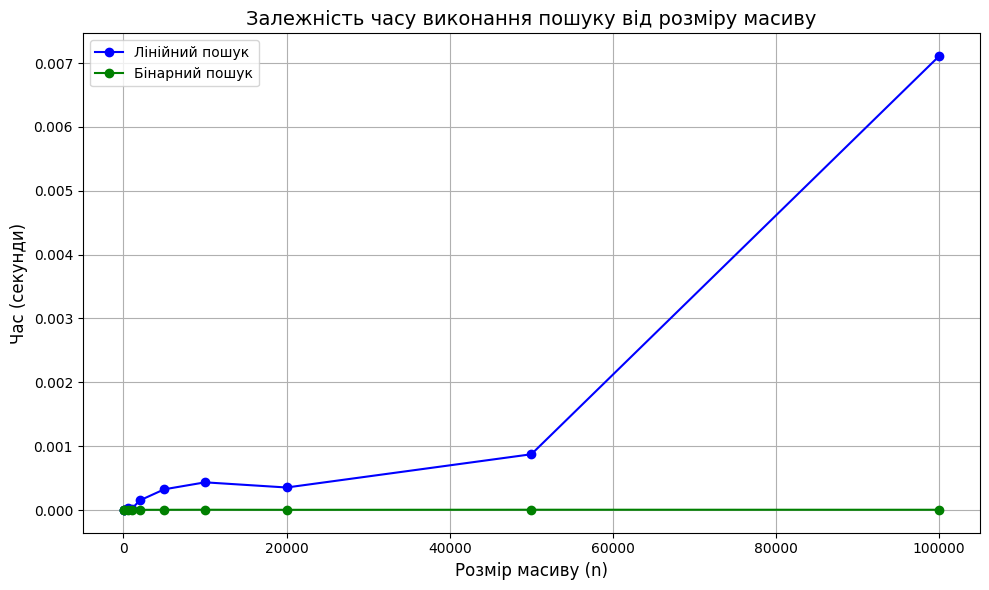

In [9]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Алгоритм лінійного пошуку
def linear_search(a_list, x):
    for i in range(len(a_list)):
        if a_list[i] == x:
            return i
    return -1

# Алгоритм бінарного пошуку (ітеративний)
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else:
        return bin_search(a_list, x, left, middle - 1)

# Функція для вимірювання часу виконання
def measure_times(sizes, repeats=5):
    lin_times = []
    bin_times = []

    for n in sizes:
        arr = np.sort(np.random.randint(0, 100000, size=n))
        x = random.choice(arr)

        # Лінійний пошук
        lin_total = 0
        for _ in range(repeats):
            start = time.perf_counter()
            linear_search(arr, x)
            end = time.perf_counter()
            lin_total += (end - start)
        lin_times.append(lin_total / repeats)

        # Бінарний пошук
        bin_total = 0
        for _ in range(repeats):
            start = time.perf_counter()
            bin_search(arr, x, 0, len(arr) - 1)
            end = time.perf_counter()
            bin_total += (end - start)
        bin_times.append(bin_total / repeats)

    df = pd.DataFrame({'n': sizes, 'linear_time': lin_times, 'binary_time': bin_times})
    return df

# Розміри масивів
sizes = [10, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

# Отримуємо результати
df = measure_times(sizes)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df['n'], df['linear_time'], 'o-', label='Лінійний пошук', color='blue')
plt.plot(df['n'], df['binary_time'], 'o-', label='Бінарний пошук', color='green')
plt.title('Залежність часу виконання пошуку від розміру масиву', fontsize=14)
plt.xlabel('Розмір масиву (n)', fontsize=12)
plt.ylabel('Час (секунди)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6 . Оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

Для малих розмірів списку лінійний пошук може бути швидшим, ніж бінарний, тому що не потрібна попередня робота для сортування списку. Однак, коли розмір списку зростає, бінарний пошук стає значно швидшим.В цілому, бінарний пошук ефективніший для великих розмірів задачі, тоді як лінійний пошук може бути ефективнішим для малих розмірів задачі.

# 7 . Контрольні питання.

* Сформулювати задачу пошуку - Задача пошуку полягає в тому , щоб знайти певне значення у певному списку даних.
* Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку? - асимптотична складність , точність , оптимізація та повнота.
* Що таке лінійний пошук і яка його асимптотична складність? - Лінійний пошук полягає у перебиранні кожного елементу списку до поки не знайдемо потрібний , або не дістанемо до кінця списку.Асимптотична складність - O(n).
* Що таке бінарний (двійковий) пошук і в чому полягає його головний принцип роботи? - Бінарний пошук полягає в тому , що в вже відсортованому списку знаходимо середній елемент , перевіряємо більший він чи менший від шуканого та беремо або ліву частину або праву залежно від того більше чи менше шукане число , після цього повторюємо цей алгоритм до поки не знайдемо шуканий елемент або список не закінчиться.
* Які переваги і недоліки використання бінарного пошуку порівняно з лінійним? - Переваги - швидкість , краще працює з великими обсягами інформації.Недоліки - треба попередньо відсортувати список , гірше працює з малими обсягами ніж лінійний.
* Які ще алгоритми пошуку існують, окрім лінійного і бінарного? - пошук по дереву , експоненційний , інтерполяційний.

# 8 . Висновки

Засвоєння різних алгоритмів пошуку в Python, від лінійного до бінарного та хешування, є важливим для ефективної обробки даних. Розуміння їхньої логіки та вимог дозволяє обирати оптимальний метод для задачі. Ключовим є також вміння оцінювати складність алгоритмів (часову та просторову) за допомогою O-нотації для порівняння їхньої ефективності. Практичне застосування та аналіз продуктивності сприяють розробці більш якісного коду.